### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [6]:
tf.keras.utils.to_categorical(trainY)
tf.keras.utils.to_categorical(testY)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [8]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

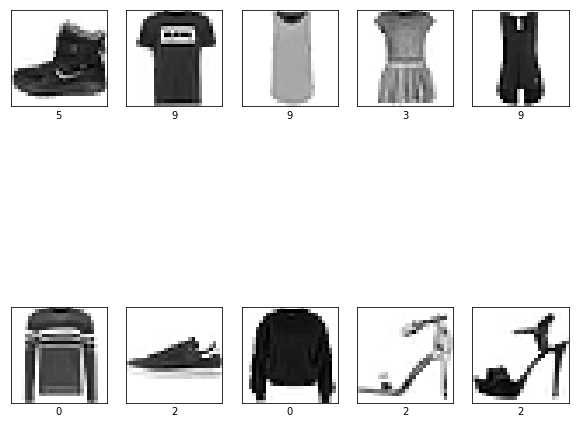

In [9]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(trainY[trainY[i]])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [30]:
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from sklearn import metrics

In [13]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28))])
model.add(Dense(120, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


### Execute the model using model.fit()

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [15]:
model.fit(trainX, trainY, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 10s 174us/step - loss: 5.3292 - acc: 0.0999
Epoch 2/10
60000/60000 [==============================] - 10s 169us/step - loss: 5.3031 - acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 11s 176us/step - loss: 5.3030 - acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 10s 175us/step - loss: 5.3033 - acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 11s 184us/step - loss: 5.3032 - acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 11s 184us/step - loss: 5.3031 - acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 11s 189us/step - loss: 5.3031 - acc: 0.1000
Epoch 8/10
60000/60000 [==============================] - 12s 205us/step - loss: 5.3031 - acc: 0.1000
Epoch 9/10
60000/60000 [==============================] - 12s 202us/step - loss: 5.3031 - acc: 0.1000
Epoch 10/10
60000/60000 [=========

In [ ]:
#There is not much improvement in accuracy score or decrease in error after 2nd epoch.

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [18]:
model1 = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28))])
model1.add(Dense(100, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(10, activation='sigmoid'))
model1.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Execute the model

In [19]:
model1.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 169us/step - loss: 1.2781 - acc: 0.6585
Epoch 2/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.7983 - acc: 0.7249
Epoch 3/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.5279 - acc: 0.8074
Epoch 4/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.4431 - acc: 0.8444
Epoch 5/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.4102 - acc: 0.8549
Epoch 6/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.3858 - acc: 0.8631
Epoch 7/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.3720 - acc: 0.8683 0s - loss: 0.3719 - acc
Epoch 8/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.3578 - acc: 0.8727
Epoch 9/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.3490 - acc: 0.8744 0s - loss: 0.3500 - ac
Epoch 10/10
60000/60000 [==================

In [ ]:
#After adding the batch normalizer, we can observe that the error is decreasing and accuracy is increasing with each epoch.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [21]:
sgd = optimizers.SGD(lr=0.001)

In [22]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [23]:
model1.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.3345 - acc: 0.8791
Epoch 2/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.3236 - acc: 0.8836
Epoch 3/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.3181 - acc: 0.8856
Epoch 4/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.3111 - acc: 0.8877
Epoch 5/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.3094 - acc: 0.8879
Epoch 6/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.3093 - acc: 0.8895
Epoch 7/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.3062 - acc: 0.8913
Epoch 8/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.2986 - acc: 0.8929
Epoch 9/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.2986 - acc: 0.8912
Epoch 10/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.2964 - 

In [ ]:
#Addition of learning rate shows better result. 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [25]:
sgd = optimizers.SGD(lr=0.03)
model2 = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28))])
model2.add(Dense(100, activation='sigmoid'))
model2.add(BatchNormalization())
model2.add(Dense(100, activation='sigmoid'))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [29]:
model2.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 13s 214us/step - loss: 1.0143 - acc: 0.5833
Epoch 2/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.9662 - acc: 0.6187
Epoch 3/10
60000/60000 [==============================] - 10s 170us/step - loss: 1.0256 - acc: 0.5939
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.9680 - acc: 0.6091
Epoch 5/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.9799 - acc: 0.6089
Epoch 6/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.9082 - acc: 0.6260
Epoch 7/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.9165 - acc: 0.6222
Epoch 8/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.8865 - acc: 0.6486
Epoch 9/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.9138 - acc: 0.6349
Epoch 10/10
60000/60000 [==============================] - 12s 197us/step - loss: 

In [ ]:
#Error is more after using segmoid instead of relu. 

## Review model

In [27]:
model1.fit(trainX, trainY, validation_data=(testX,testY), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.2893 - acc: 0.8955 - val_loss: 0.3792 - val_acc: 0.8668
Epoch 2/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.2850 - acc: 0.8966 - val_loss: 0.3723 - val_acc: 0.86692847 - 
Epoch 3/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.2811 - acc: 0.8976 - val_loss: 0.3706 - val_acc: 0.8694
Epoch 4/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.2784 - acc: 0.8984 - val_loss: 0.3788 - val_acc: 0.8690: 0s - loss: 0
Epoch 5/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.2749 - acc: 0.8999 - val_loss: 0.3858 - val_acc: 0.8657
Epoch 6/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.2706 - acc: 0.9014 - val_loss: 0.3595 - val_acc: 0.8693
Epoch 7/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.2696 - acc: 0.9012

In [28]:
model2.fit(trainX, trainY, validation_data=(testX,testY), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 222us/step - loss: 1.2043 - acc: 0.4801 - val_loss: 1.1395 - val_acc: 0.5022
Epoch 2/10
60000/60000 [==============================] - 10s 175us/step - loss: 1.2730 - acc: 0.4393 - val_loss: 1.2936 - val_acc: 0.4654
Epoch 3/10
60000/60000 [==============================] - 12s 196us/step - loss: 1.2324 - acc: 0.4926 - val_loss: 1.3536 - val_acc: 0.4507
Epoch 4/10
60000/60000 [==============================] - 12s 197us/step - loss: 1.2028 - acc: 0.4854 - val_loss: 1.2671 - val_acc: 0.4545
Epoch 5/10
60000/60000 [==============================] - 12s 202us/step - loss: 1.1496 - acc: 0.5029 - val_loss: 1.0870 - val_acc: 0.5531
Epoch 6/10
60000/60000 [==============================] - 12s 207us/step - loss: 1.0944 - acc: 0.5404 - val_loss: 1.3978 - val_acc: 0.4197
Epoch 7/10
60000/60000 [==============================] - 13s 214us/step - loss: 1.1742 - acc: 0.5035 - val_loss: 1.

In [31]:
model1_y_pred=model1.predict_classes(trainX)
metrics.accuracy_score(trainY,model1_y_pred)

0.9106833333333333

In [32]:
model2_y_pred=model2.predict_classes(trainX)
metrics.accuracy_score(trainY,model2_y_pred)

0.6658833333333334

In [ ]:
#Ran two models with validation data. 
#Accuracy of model1 is much better than model 2.

### Run the model

In [34]:
model1_y_pred=model1.predict_classes(testX)
metrics.accuracy_score(testY,model1_y_pred)

0.8729

In [35]:
model2_y_pred=model2.predict_classes(testX)
metrics.accuracy_score(testY,model2_y_pred)

0.654

In [ ]:
#Ran both models with test data. 
#Again model1 shows good result. 
#So relu should be used in dense layers. 